# seaborn 基礎トレーニングノート
ネット上で見つけたお手本エントリを見ながら、手を動かして、seaborn の練習。
教材エントリ
* https://qiita.com/hik0107/items/3dc541158fceb3156ee0



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x = np.random.normal(size=100) #ランダムデータをnumpy arrayとして作る
titanic = sns.load_dataset("titanic") ##kaggleで有名な、タイタニック号の生死者データ
tips = sns.load_dataset("tips")  ## お店の食事時間と会計総額とチップの関係のデータ
iris = sns.load_dataset("iris")  ## Rでお馴染みのアヤメの統計データ

Seaborn で用意しているデータセットを見てみる。
データフレームの形になっているので、扱いやすい。

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# ヒストグラムの描画
seaborn では、 distplot() というメソッドを使ってヒストグラムを描画することができる。
seaborn.distplot() の公式解説は以下のＵＲＬにある。
https://seaborn.pydata.org/generated/seaborn.distplot.html

## 定義
> seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)

## distplot() の引数
* a : １次元配列・リスト/Series
* kde : boolean, ガウシアンカーネル密度推定曲線を描くかどうかを指定する。デフォルトは True
* hist : boolean, ヒストグラムを描画するかどうか。デフォルトは、True
* rug : boolean, ラグプロットを階級軸側に描画するかどうか。デフォルトは False
* vertical : boolean, ヒストグラムを垂直方向に描画するかどうか。デフォルトは False。Trueにすると、Y軸を階級軸としてヒストグラムを描画する。


* Seaborn によるヒストグラムサンプル


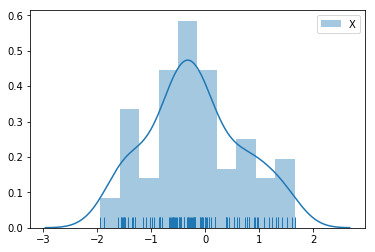

- 青い曲線が、ガウシアンカーネル密度推定曲線
- X軸上にあるバーコードのようなプロットが、ラグプロット



[vertical=True] 垂直方向にヒストグラムを描画する場合


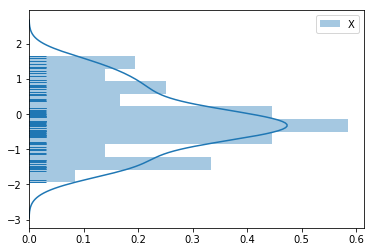

In [7]:
print("* Seaborn によるヒストグラムサンプル")
ax = sns.distplot(x, kde=True, rug=True, hist=True, vertical=False, bins=10, label="X") 
plt.legend()
plt.show()
print("- 青い曲線が、ガウシアンカーネル密度推定曲線")
print("- X軸上にあるバーコードのようなプロットが、ラグプロット")
print("\n\n")


print("[vertical=True] 垂直方向にヒストグラムを描画する場合")
ax = sns.distplot(x, kde=True, rug=True, hist=True, vertical=True, bins=10, label="X") 
plt.legend()
plt.show()

## ヒストグラム：キーワード引数を利用した高度な描画設定
引数 kde_kws, hist_kws を辞書形式で指定することで、高度な描画設定をすることができる。
* kde_kws の指定方法
    * color : カーネル密度推定曲線の色
    * lw : カーネル密度推定曲線の太さ
    * label : カーネル密度推定曲線のラベル名
    * kernel : 'gau'/'cos’/‘biw’/‘epa’/ tri’/‘triw’から選ぶ。カーネル密度推定関数の種類 
    * cumulative : boolean, 累積分布を描画するかどうか。デフォルトは False
    * shade : boolean, カーネル密度推定曲線の領域を塗りつぶすかどうか。デフォルトは False
    * パラメータは、以下の kdeplot のページにあるものが使える。
        * https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
* hist_kwd の指定方法
    * histtype : "step" を指定すると階段状のヒストグラムを描画する
    * linewidth : ヒストグラムの輪郭線の太さ
    * alpha : 透明度
    * color : ヒストグラムのカラー

## (1) カーネル密度推定曲線のカスタマイズ
kde_kws のパラメータを色々と変えて、描画してみる。

- kde_kws['kernel'] = 'cos' の場合


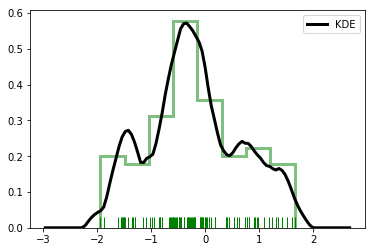

- kde_kws['kernel'] = 'gau' の場合


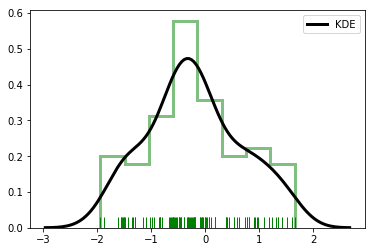

- kde_kws['cumulative'] = True の場合(累積分布を描画)


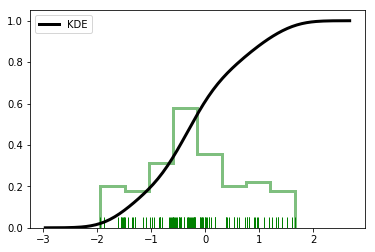

- kde_kws['shade'] = True の場合(領域を塗りつぶす)


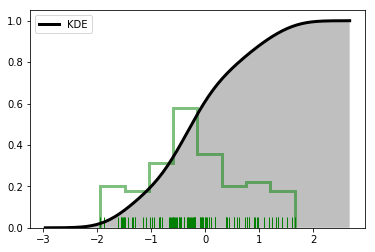

- kde_kws['shade'] = True の場合(領域を塗りつぶす)


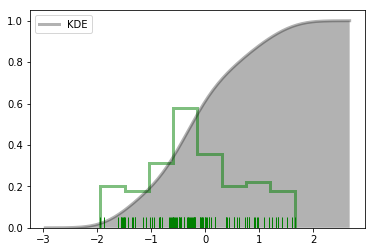

- kde_kwsだけを指定した場合


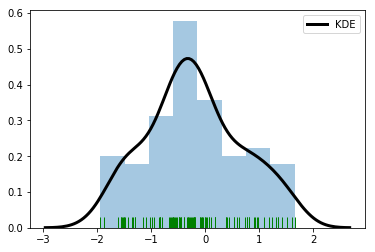

In [8]:
print("- kde_kws['kernel'] = 'cos' の場合")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"cos","label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()

print("- kde_kws['kernel'] = 'gau' の場合")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"gau","label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()


print("- kde_kws['cumulative'] = True の場合(累積分布を描画)")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"gau","label": "KDE","cumulative":True},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()


print("- kde_kws['shade'] = True の場合(領域を塗りつぶす)")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"gau","label": "KDE","cumulative":True, "shade":True},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()

print("- kde_kws['shade'] = True の場合(領域を塗りつぶす)")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"gau","label": "KDE","cumulative":True, "shade":True, "alpha":0.3},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()


print("- kde_kwsだけを指定した場合")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"gau","label": "KDE"})
plt.legend()
plt.show()


## カーネル密度推定計算に考慮する範囲の指定
kde_kws['clip'] = (0.0, 2.0) というように指定すると、カーネル密度推定に使うデータの範囲を指定できる。
* カーネル密度推定曲線を、指定範囲で文字通りクリップして描画するわけではないので注意！

- kde_kws['clip'] = (0.0, 1.0) の場合(カーネル密度推定の計算に考慮する範囲の指定)


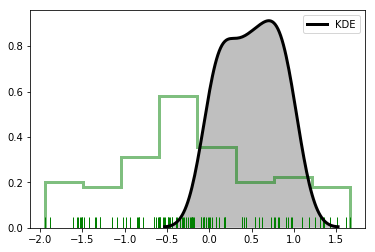

- kde_kws['clip'] = (0.0, 3.0) の場合(カーネル密度推定の計算に考慮する範囲の指定)


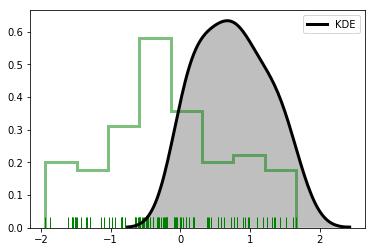

In [9]:
print("- kde_kws['clip'] = (0.0, 1.0) の場合(カーネル密度推定の計算に考慮する範囲の指定)")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", 
                            "clip": (0.0, 1.0),
                            "lw": 3, 
                            "kernel":"gau",
                            "label": "KDE",
                            "cumulative":False, 
                            "shade":True},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()

print("- kde_kws['clip'] = (0.0, 3.0) の場合(カーネル密度推定の計算に考慮する範囲の指定)")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", 
                            "clip": (0.0, 3.0),
                            "lw": 3, 
                            "kernel":"gau",
                            "label": "KDE",
                            "cumulative":False, 
                            "shade":True},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()



## ヒストグラムの描画設定をしてみる
hist_kws をいろいろ変えて描画してみる。
* hist_kws['histtype'] の設定
    * hist_kws['histtype'] = 'step' にすると、ヒストグラムの輪郭線だけ描画される。
    * hist_kws['histtype'] = 'stepfilled' にすると、塗りつぶされたヒストグラムが描画される。
* hist_kws['range'] の設定
    * ヒストグラムを描画する範囲をリスト形式で指定する。
        * (例) hist_kws['range'] = [0,3]

- hist_kws['histtype'] = 'step' の場合


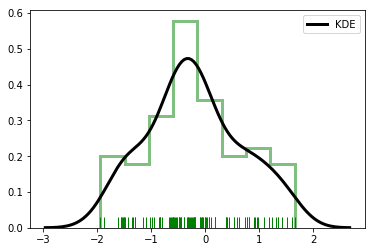

- hist_kws['histtype'] = 'stepfilled' の場合


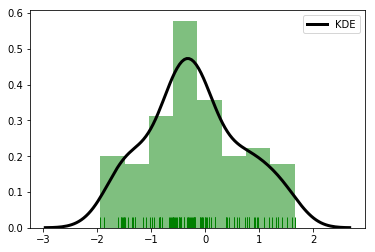

- hist_kws['histtype'] = 'stepfilled'
- hist_kws['range'] = [0,3]' の場合
0～3 の範囲でのみ、ヒストグラムが表示される。


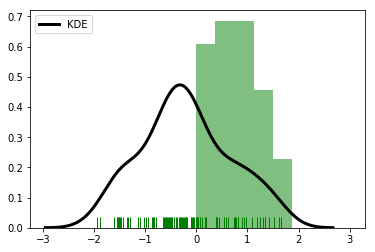

In [10]:
print("- hist_kws['histtype'] = 'step' の場合")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"gau","label": "KDE"},
                   hist_kws={"histtype": "step", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()

print("- hist_kws['histtype'] = 'stepfilled' の場合")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"gau","label": "KDE"},
                   hist_kws={"histtype": "stepfilled", "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()


print("- hist_kws['histtype'] = 'stepfilled'")
print("- hist_kws['range'] = [0,3]' の場合")
print("0～3 の範囲でのみ、ヒストグラムが表示される。")
ax = sns.distplot(x, rug=True, rug_kws={"color": "g"},
                   kde_kws={"color": "k", "lw": 3, "kernel":"gau","label": "KDE"},
                   hist_kws={"histtype": "stepfilled",
                             "range":[0,3], 
                             "linewidth": 3,
                             "alpha": 0.5, "color": "g"})
plt.legend()
plt.show()


# カーネル密度推定曲線の描画
seaborn.kdeplot()メソッドを使うと、カーネル密度推定曲線を描画することができる。
 定義
> seaborn.kdeplot(data, data2=None, shade=False, vertical=False, kernel='gau', bw='scott', gridsize=100, cut=3, clip=None, legend=True, cumulative=False, shade_lowest=True, cbar=False, cbar_ax=None, cbar_kws=None, ax=None, **kwargs)

* data だけ指定すると、一次元のカーネル密度推定曲線を描く。
* dataとdata2 を指定すると、二次元平面上でカーネル密度推定曲線を描く
* 複数のデータセットのカーネル密度推定曲線を描画する際には、 shade_lowest = False とすること。
* shade=True とすると、等高線図のようにグラデーションでカーネル密度推定曲線を描画する
* n_levelsの値を変えると、曲線間が狭くなり、より詳細な曲線が得られる。

In [11]:
# 描画用のテストデータを生成する
mean, cov = [0, 2], [(1, .5), (.5, 1)]
kx, ky = np.random.multivariate_normal(mean, cov, size=50).T

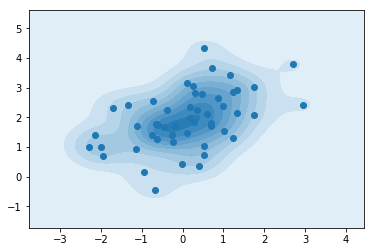

- n_levels=60 の場合：カーネル密度推定曲線の間隔が密になる
ここまで来ると曲線というよりは、グラデーションでカーネル密度分布を描画しているようなものである。


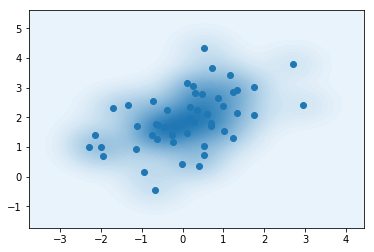

In [12]:
# 二次元平面のカーネル密度推定曲線
ax = sns.kdeplot(kx, ky, n_levels=10, shade=True)
# 散布図で比較する
plt.scatter(kx,ky)
#sns.jointplot(kx, ky)
plt.show()


print("- n_levels=60 の場合：カーネル密度推定曲線の間隔が密になる")
print("ここまで来ると曲線というよりは、グラデーションでカーネル密度分布を描画しているようなものである。")
# n_levels = 60 の場合
ax = sns.kdeplot(kx, ky, n_levels=60, shade=True)
# 散布図で比較する
plt.scatter(kx,ky)
#sns.jointplot(kx, ky)
plt.show()


## カーネル密度推定曲線：描画オプション
* cbar = True : カラーグラデーションバーを描画する。
* shade = True : 等高線グラデーション描画

- shade=True : グラデーションでカーネル密度推定曲線を描画する


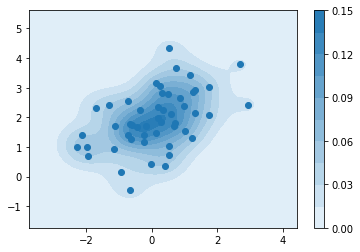

In [13]:
print("- shade=True : グラデーションでカーネル密度推定曲線を描画する")
ax = sns.kdeplot(kx, ky, shade=True, cbar=True)
plt.scatter(kx,ky)
plt.show()


# カーネル密度推定曲線：複数のカーネル密度を描画する
* 描画カラーは cmap で指定すべし。グラデーションで描画するからである。

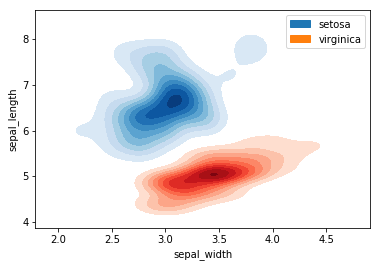

In [14]:
setosa = iris.query('species=="setosa"')
virginica = iris.query('species=="virginica"')
sns.kdeplot(setosa.sepal_width, setosa.sepal_length, label="setosa", legend=True,
            cmap="Reds", shade=True, shade_lowest=False)
sns.kdeplot(virginica.sepal_width, virginica.sepal_length,label="virginica", legend=True,
            cmap="Blues", shade=True, shade_lowest=False)
plt.legend()
plt.show()

# 散布図の描画
公式サイト: https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn.scatterplot

## 注意
seaborn.scatterplot は、v0.9.0 から使えるようになった。
http://seaborn.pydata.org/whatsnew.html#v0-9-0-july-2018

> Three completely new plotting functions have been added: relplot(), scatterplot(), and lineplot(). The first is a figure-level interface to the latter two that combines them with a FacetGrid. The functions bring the high-level, dataset-oriented API of the seaborn categorical plotting functions to more general plots (scatter plots and line plots).

## 【定義】

    seaborn.scatterplot(x=None, y=None, hue=None, style=None, size=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, x_bins=None, y_bins=None, units=None, estimator=None, ci=95, n_boot=1000, alpha='auto', x_jitter=None, y_jitter=None, legend='brief', ax=None, **kwargs)

seaborn では、jointplot()メソッド、scatterplot()メソッドを使って、散布図を描画する。
デフォルトの状態で、変数x,yのラベル、分布ヒストグラム、散布図を一度に描画できる。これは便利だ。
* ただし、jointplot() には引数 hue がないので注意。分類クラスカラムを指定して、色分けすることはできない。
* scatterplot() には引数 hue があるので、色分け用カラムが使える。



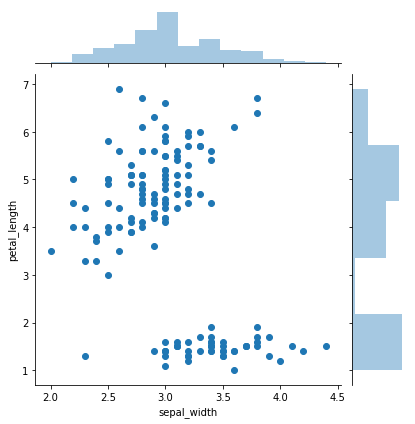

In [15]:
sns.jointplot('sepal_width', 'petal_length', data=iris)

- legend='brief'/'full' : 凡例を表示する。デフォルトは凡例を表示する


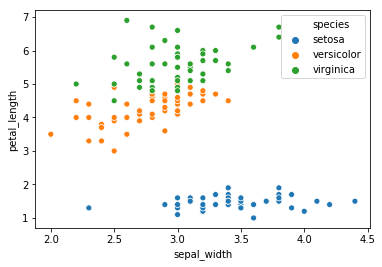



- legend=None : 凡例を非表示にする


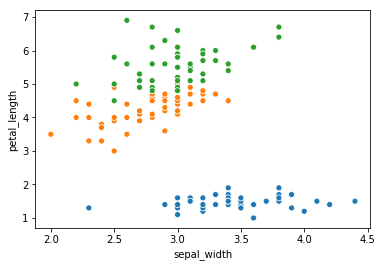

In [16]:
print("- legend='brief'/'full' : 凡例を表示する。デフォルトは凡例を表示する")
ax = sns.scatterplot('sepal_width', 'petal_length', data=iris,
                     hue="species")
plt.show()

print("\n")
print("- legend=None : 凡例を非表示にする")
ax = sns.scatterplot('sepal_width', 'petal_length', data=iris,
                     hue="species", 
                    legend=None)
plt.show()



## 散布図のマーカー形状を分類によって変える
引数 style に、分類を示すカラム名を指定することで、マーカーの形状を変えることができる。

style に指定するカラムであるが、数値型/文字列型にせよ、カテゴリ型に変換されて使用される。

以下の例では、hue を指定して、アヤメの種類(spieces)に対応する色を適用することに加え、style にも 'spieces'　を指定して、マーカーの形状を変えている。

- style='spieces' : カラム spices の値に応じて、マーカーの形状を変える


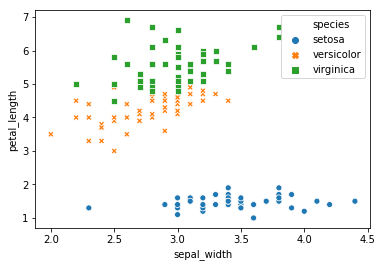

In [17]:
print("- style='spieces' : カラム spices の値に応じて、マーカーの形状を変える")
ax = sns.scatterplot('sepal_width', 'petal_length', data=iris,
                     hue="species", 
                    style="species")
plt.show()

## マーカーの色と形状を両方指定する
引数 hue, style に別々のカラムを割り当てることができる。

以下の例では、曜日(day)で色を変え、時間帯(time)で、マーカーの形状を指定している。


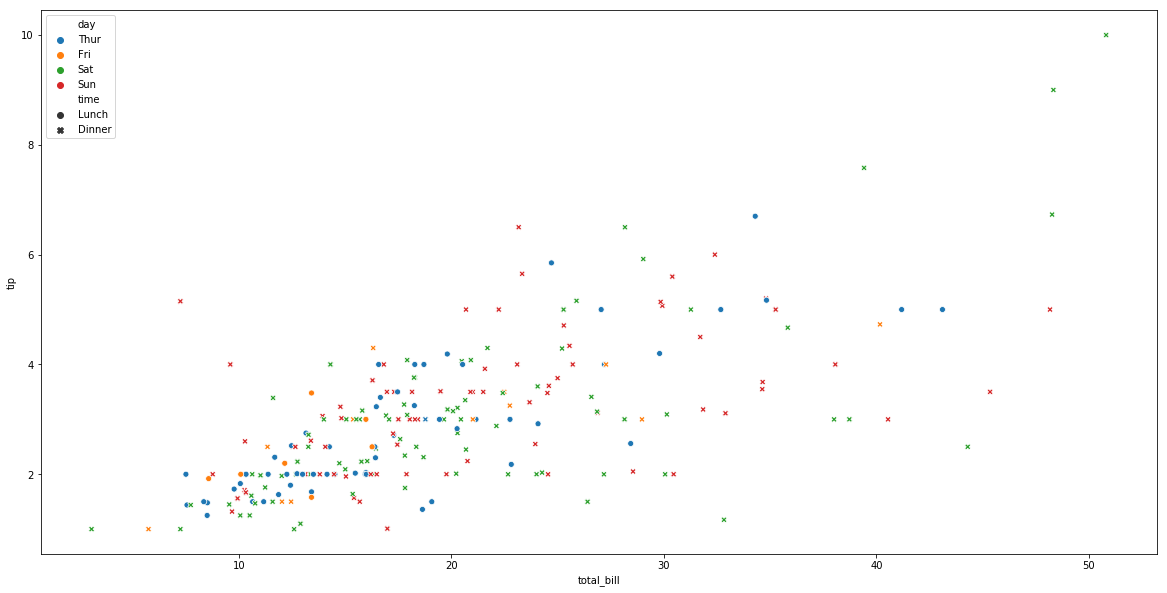

In [18]:
plt.figure(figsize=(20,10))
ax = sns.scatterplot(x="total_bill", y="tip", 
                     hue="day", style="time", data=tips)
plt.show()

## 引数 sizeを用いたマーカーサイズの設定
引数 size に、マーカーの大きさを指し示すカラム名を指定すると、以下のチャートのように、項目の値に応じてマーカーの値が変化する。

* ただし、項目の値間の差がないと、いずれのマーカーも同じ大きさになってしまう。

- size="size" の場合


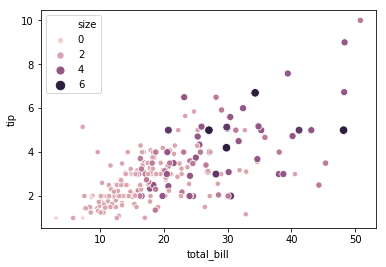

In [19]:
print('- size="size" の場合')
ax = sns.scatterplot(x="total_bill", y="tip",
                      hue="size", size="size",
                     data=tips)

In [20]:
print('- size は、食事の量を示す数値を格納したカラムになっている。')
tips.head()

- size は、食事の量を示す数値を格納したカラムになっている。


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


食事の量(size) で色を分けて、チップの金額を大きさに反映すると以下のようになる。
* hue = 'size'
* size = 'tip'

- size="size" の場合


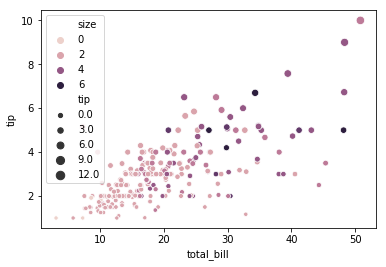

In [21]:
print('- size="size" の場合')
ax = sns.scatterplot(x="total_bill", y="tip",
                      hue="size", size="tip",
                     data=tips)

## sizes:マーカーのサイズの範囲を指定する
引数 size と紛らわしいが、sizes でタプルまたはリストでマーカーのサイズを指定することが出来る。
* size の値だが、1000付近の値になると、傍目から見てもはっきりと大きいサイズに見える。

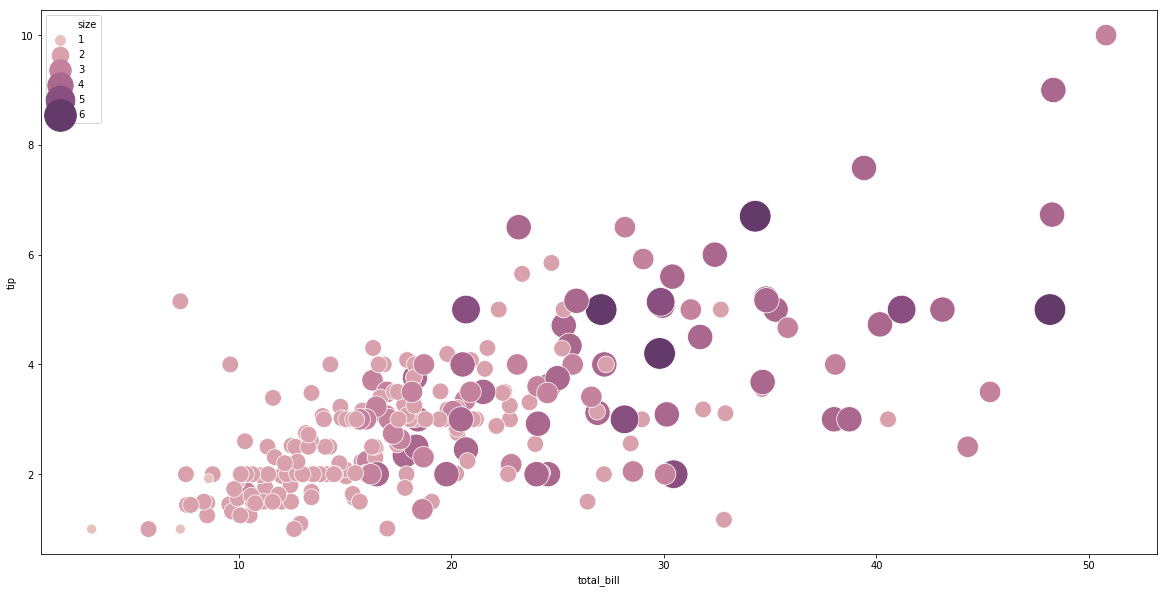

In [22]:
plt.figure(figsize=(20,10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="total_bill", y="tip",
                      hue="size", size="size",
                      sizes=(100, 1000), palette=cmap,
                      legend="full", data=tips)

## hue_norm:色分けの仕方を指定する
hue で指定したカラムの値を色に割り当てる際、標準化の範囲を hue_norm を定義できる。

例えば hue_norm = (0, 6) とすると、最小値 0 , 最大値 6 を用いた最大最小標準化をする模様。
* 値が6以上であれば、カラーパレットの最大値
* 値が0以下であれば、カラーパレットの最小値
ということになる。

● hue_norm = (0,6)
最大6, 最小0 で標準化＆クリッピングをしてカラーパレットを割り当てる


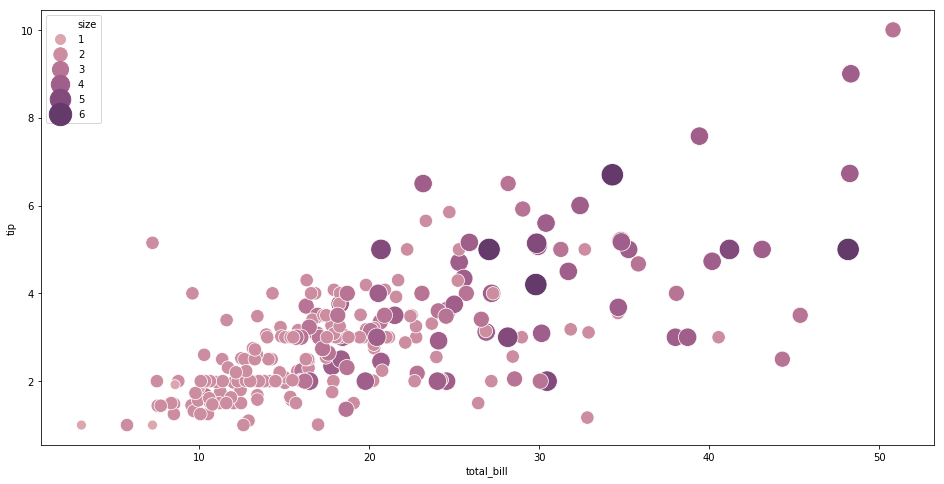

In [23]:
print('● hue_norm = (0,6)')
print('最大6, 最小0 で標準化＆クリッピングをしてカラーパレットを割り当てる')
plt.figure(figsize=(16, 8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="total_bill", y="tip",
                      hue="size", size="size",
                      sizes=(100, 500),
                      hue_norm=(0,6),
                      palette=cmap,
                      legend="full", data=tips)

● hue_norm = (3,6)
最大6, 最小3 で標準化＆クリッピングをしてカラーパレットを割り当てる
size 3,2,1 は、同じ色（カラーパレットの最小値）になる。
size 4 から 6 でグラデーションになる。


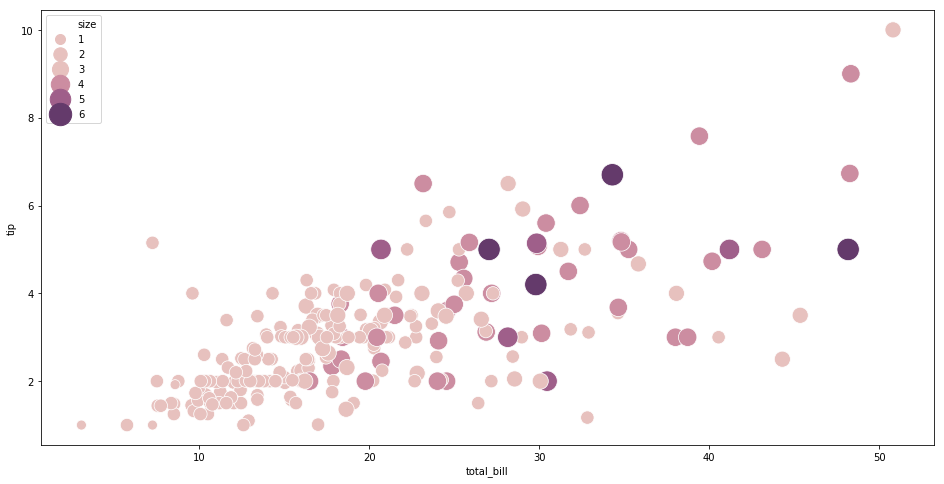

In [24]:
print('● hue_norm = (3,6)')
print('最大6, 最小3 で標準化＆クリッピングをしてカラーパレットを割り当てる')
print('size 3,2,1 は、同じ色（カラーパレットの最小値）になる。')
print('size 4 から 6 でグラデーションになる。')
plt.figure(figsize=(16,8))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="total_bill", y="tip",
                      hue="size", size="size",
                      sizes=(100, 500),
                      hue_norm=(3,6),
                      palette=cmap,
                      legend="full", data=tips)


## marker:マーカーの種類を指定する
描画するデータポイント全てに適用されるマーカーの種類を指定する。
* マーカー定義は、matplotlibに準拠
* marker="+":文字通りのプラス

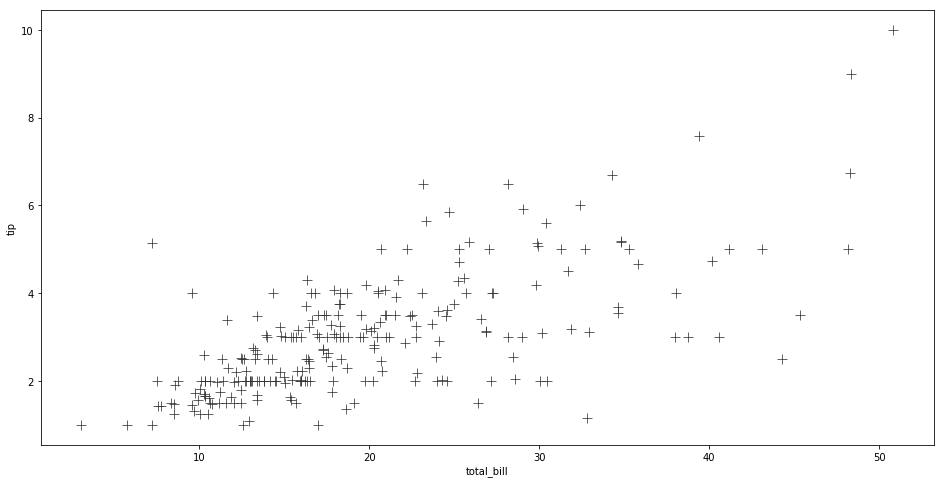

In [25]:
# matplotlib でお馴染みの '+' マーカーで描画
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="total_bill", y="tip",
                      s=100, color=".2", marker="+",
                      data=tips)
plt.show()

## markers:マーカーの種類をカスタム設定する
引数markersを使うと、マーカーの形状をカスタムに指定することができる。

以下の例では、カラム"time"の値に応じて、マーカーの種類を切り替える設定(markers)を適用している。
* ただし、markers で指定した定義に無い値に遭遇すると、エラーを吐き出して処理が中断されるので注意。
    * マーカー定義に漏れが無い様に、値の固有値チェックはしておくべし。

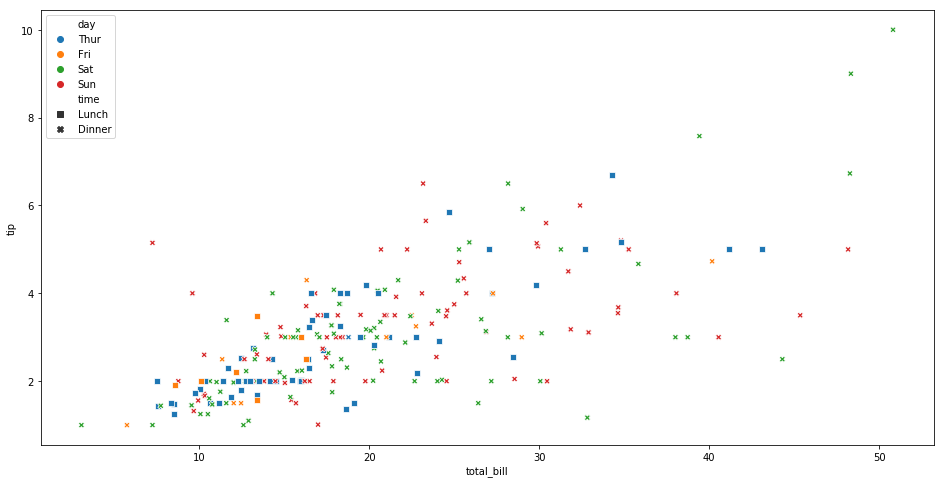

In [26]:
plt.figure(figsize=(16,8))
markers = {"Lunch": "s", "Dinner": "X"}
ax = sns.scatterplot(x="total_bill", y="tip", style="time",
                     markers=markers,
                     hue="day",
                     #size="size",
                     #sizes=(100, 500),
                     data=tips)

## 様々な種類のインデックスへの対応
seaborn は、様々な種類のインデックスに対応している。

以下の例は、日付型(datetime64)のインデックスを持つデータフレームの散布図を描画している。

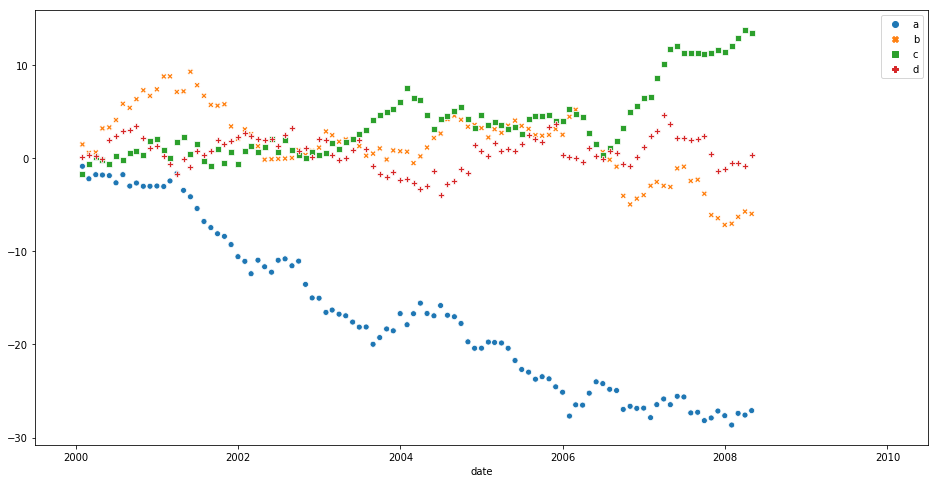

In [27]:
plt.figure(figsize=(16,8))
index = pd.date_range("1 1 2000", periods=100,
                      freq="m", name="date")

# 正規乱数の累積なので、ランダムウォーク的な動きを見せる
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
ax = sns.scatterplot(data=wide_df)

In [28]:
wide_df.head()

,a,b,c,d
date,,,,
2000-01-31,-0.889760,1.452520,-1.692999,0.060505
2000-02-29,-2.230629,0.539937,-0.657092,0.369755
2000-03-31,-1.790639,0.593726,0.083703,0.257966
2000-04-30,-1.826914,3.170185,-0.238983,-0.075361
2000-05-31,-1.893859,3.277377,-0.608125,1.926940


In [29]:
wide_df.loc[wide_df.index[10]]

a   -3.033150
b    6.653584
c    1.867518
d    1.019242
Name: 2000-11-30 00:00:00, dtype: float64

In [30]:
index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31', '2000-11-30', '2000-12-31',
               '2001-01-31', '2001-02-28', '2001-03-31', '2001-04-30',
               '2001-05-31', '2001-06-30', '2001-07-31', '2001-08-31',
               '2001-09-30', '2001-10-31', '2001-11-30', '2001-12-31',
               '2002-01-31', '2002-02-28', '2002-03-31', '2002-04-30',
               '2002-05-31', '2002-06-30', '2002-07-31', '2002-08-31',
               '2002-09-30', '2002-10-31', '2002-11-30', '2002-12-31',
               '2003-01-31', '2003-02-28', '2003-03-31', '2003-04-30',
               '2003-05-31', '2003-06-30', '2003-07-31', '2003-08-31',
               '2003-09-30', '2003-10-31', '2003-11-30', '2003-12-31',
               '2004-01-31', '2004-02-29', '2004-03-31', '2004-04-30',
               '2004-05-31', '2004-06-30', '2004-07-31', '2004-08-31',
      

In [31]:
from IPython.display import display

In [34]:
for _day, _df in tips.groupby('day'):
    display(_df.head())

,total_bill,tip,sex,smoker,day,time,size
77,27.20,4.00,Male,No,Thur,Lunch,4
78,22.76,3.00,Male,No,Thur,Lunch,2
79,17.29,2.71,Male,No,Thur,Lunch,2
80,19.44,3.00,Male,Yes,Thur,Lunch,2
81,16.66,3.40,Male,No,Thur,Lunch,2


,total_bill,tip,sex,smoker,day,time,size
90,28.97,3.00,Male,Yes,Fri,Dinner,2
91,22.49,3.50,Male,No,Fri,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
93,16.32,4.30,Female,Yes,Fri,Dinner,2
94,22.75,3.25,Female,No,Fri,Dinner,2


,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
20,17.92,4.08,Male,No,Sat,Dinner,2
21,20.29,2.75,Female,No,Sat,Dinner,2
22,15.77,2.23,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
